In [1]:
### Imports des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

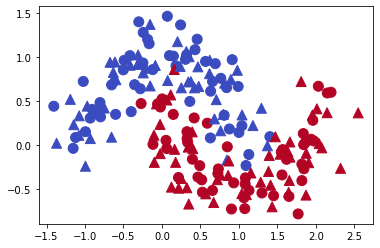

In [2]:
### Simulation de données en deux dimensions séparables linéairement
from sklearn.datasets import make_moons
X_train, y_train = make_moons(noise = 0.2, random_state = 33, n_samples = 100)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = 'coolwarm', s = 100)
X_test, y_test = make_moons(noise = 0.2, random_state = 42, n_samples = 100)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = 'coolwarm', s = 100, marker = '^')

In [3]:
import matplotlib.pyplot as plt

def plot_boundary(clf, X, y):
    h = 0.002
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    plt.contourf(xx, yy, Z, cmap = 'cool', alpha = 0.75)

    plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'coolwarm', s = 100)
    #plt.title('score : ' + str(clf.score(X,y)))
    plt.xlabel('$X^1$')
    plt.ylabel('$X^2$')

# Réglage des hyper-paramètres en fonction de accuracy
Résultats de validation sur l'ensemble des paramètres:
GridSearchCV(estimator=SVC(),
             param_grid=[{'C': array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                          'gamma': array([ 0.01,  0.1 ,  1.  , 10.  ]),
                          'kernel': ['rbf']},
                         {'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'degree': [1, 2, 3, 4], 'kernel': ['poly']}],
             scoring='accuracy') {'mean_fit_time': array([0.00219812, 0.00120025, 0.0014009 , 0.00160007, 0.00080004,
       0.        , 0.        , 0.00190229, 0.        , 0.        ,
       0.        , 0.00312529, 0.        , 0.00312457, 0.00312519,
       0.        , 0.00312519, 0.        , 0.00539513, 0.00059996,
       0.00099988, 0.00080004, 0.00100079, 0.00080018, 0.        ,
       0.        , 0.00312405, 0.00190158, 0.        , 0.        ,
       0.        , 0.00312552, 0.        , 0.        , 0.

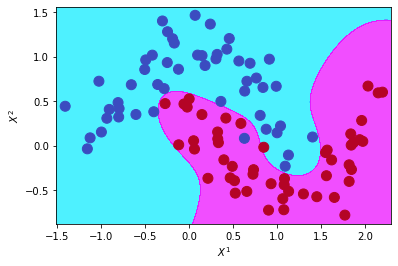

In [5]:
### Procédure d'estimation d'un SVM pour différentes valeurs de C et 
### -> différentes fenêtres du noyau RBF (gamma)
### -> différentes degré d'un noyau polynomial (degree)
### -> GridSearchCV

parameters = [
    {'kernel': ['rbf'], 'gamma': np.logspace(-2, 1, 4), 'C': np.logspace(0, 4, 5)},
    {'kernel': ['poly'], 'degree': [1, 2, 3, 4], 'C': np.logspace(-2, 2, 5)}
]
score = 'accuracy' #recall

print("# Réglage des hyper-paramètres en fonction de %s" % score)

clf = GridSearchCV(SVC(), parameters, scoring=score)
clf.fit(X_train, y_train)

print("Résultats de validation sur l'ensemble des paramètres:")
print(clf, clf.cv_results_)


print()        
print("Meilleurs paramètres:")
print(clf.best_params_)
print("Frontière de décision:")
plot_boundary(clf, X_train, y_train)
plt.show()

In [7]:
### Résultats de test pour les meilleurs paramètres

print("Rapport de classification sur l'ensemble de test:")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

Rapport de classification sur l'ensemble de test:

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        50
           1       0.96      0.86      0.91        50

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100

